In [55]:
import pandas as pd

# Classification

## 1. Binary classification

In [56]:
df_voice = pd.read_csv('datasets/gender_voice_dataset.csv')
df_voice.sample(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
705,0.149457,0.060192,0.130903,0.098288,0.197021,0.098732,3.292051,16.818157,0.888853,0.396658,...,0.149457,0.101820,0.090909,0.217391,0.403942,0.102539,0.805664,0.703125,0.717593,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
1978,0.206577,0.033291,0.203083,0.187421,0.233710,0.046290,2.277132,9.688894,0.870286,0.166226,...,0.206577,0.166291,0.029851,0.238806,1.217238,0.007812,6.148438,6.140625,0.250589,female
3038,0.229854,0.041509,0.237416,0.211439,0.257968,0.046530,2.019106,7.152700,0.861555,0.205353,...,0.229854,0.220893,0.072464,0.277778,0.394423,0.205078,0.820312,0.615234,0.335979,female
1653,0.134785,0.082020,0.142053,0.057067,0.202405,0.145337,1.341973,5.596726,0.973843,0.801313,...,0.134785,0.179867,0.028520,0.275862,0.521739,0.023438,3.875000,3.851562,0.153772,female


In [57]:
# To convert str values categ in int
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df_voice['label'] = labelEncoder.fit_transform(df_voice['label'].astype(str))

df_voice.head(3)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1


## 1. Exploration des données

<Axes: title={'center': 'meanfreq'}, xlabel='label'>

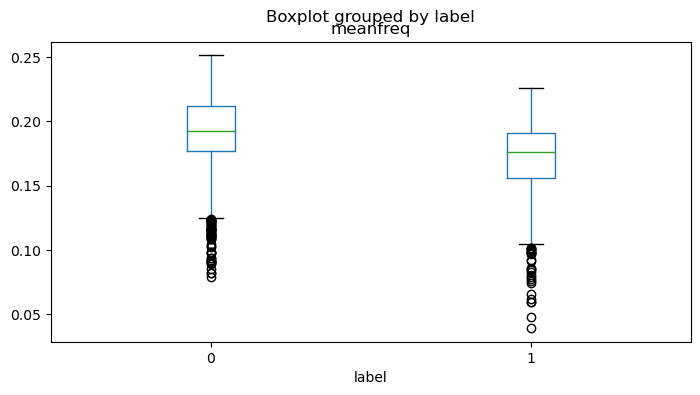

In [58]:
df_voice.boxplot(by='label', column=['meanfreq'], grid=False, figsize=(8,4))

## 1. Training model

In [59]:
from sklearn.model_selection import train_test_split

X = df_voice.drop(["label"], axis=1)
Y = df_voice["label"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [60]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty='l2', solver='liblinear')
logistic_model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [61]:
y_pred = logistic_model.predict(x_test)

## 1. Evalutate model

In [62]:
# To see which variable were good predicted
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[257  44]
 [ 10 323]]


In [63]:
print("Training score : ", logistic_model.score(x_train, y_train))

Training score :  0.909629044988161


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy : ', acc)
print('Precision score : ', pre)
print('Recall score : ', recall)

Accuracy :  0.9148264984227129
Precision score :  0.8801089918256131
Recall score :  0.96996996996997


## 2. Multiple types of classifications

In [65]:
data = pd.read_csv('datasets/german_credit_data_dataset.csv')
data.head(3)

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1,A191,A201,2
2,A14,12,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2,A191,A201,1


In [66]:
data = data.drop(['telephone', 'personal', 'present_residence', 'other_installment_plans'], axis=1)

## 2. Preparing data

In [67]:
data['savings'].unique()

array(['A65', 'A61', 'A63', 'A64', 'A62'], dtype=object)

In [68]:
from sklearn.preprocessing import LabelEncoder

savings_dict = {'A65' : 0, 'A61' : 1, 'A62' : 2, 'A63' : 3, 'A64' : 4}

data['savings'].replace(savings_dict, inplace=True)
data.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,other_debtors,property,age,housing,existing_credits,job,dependents,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,0,A75,4.0,A101,A121,67.0,A152,2.0,A173,1,A201,1
1,A12,48,A32,A43,5951.0,1,A73,2.0,A101,A121,22.0,A152,1.0,A173,1,A201,2
2,A14,12,A34,A46,2096.0,1,A74,2.0,A101,A121,49.0,A152,1.0,A172,2,A201,1
3,A11,42,A32,A42,7882.0,1,A74,2.0,A103,A122,45.0,A153,1.0,A173,2,A201,1
4,A11,24,A33,A40,4870.0,1,A73,3.0,A101,A124,53.0,A153,2.0,A173,2,A201,2


In [69]:
data = pd.get_dummies(data, columns=['checking_account_status',
                                    'credit_history',
                                    'purpose',
                                    'present_employment',
                                    'other_debtors',
                                    'property',
                                    'housing',
                                    'job',
                                    'foreign_worker'])

data.shape

(1000, 48)

## 3.Training model

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [71]:
def naive_bayes(x_train, y_train) :
    print('Naive bayes classifier')
    
    classifier = GaussianNB()
    classifier.fit(x_train, y_train)
    
    return classifier

In [72]:
def k_nearest_neighbors(x_train, y_train) :
    print('KNN classifier')
    
    classifier = KNeighborsClassifier(n_neighbors=10)
    classifier.fit(x_train, y_train)
    
    return classifier

In [73]:
def svc(x_train, y_train) :
    print('SVC classifier')
    
    classifier = SVC(kernel='rbf', gamma='scale')
    classifier.fit(x_train, y_train)
    
    return classifier

In [74]:
def decision_tree(x_train, y_train) :
    print('Decision tree classifier')
    
    classifier = DecisionTreeClassifier(max_depth=6)
    classifier.fit(x_train, y_train)
    
    return classifier

In [75]:
def build_and_train_model(data, target_name, classification_fn):
    
    X = data.drop(target_name, axis=1)
    Y = data[target_name]
    
    x_train, x_test, y_train, y_test = \
        train_test_split(X, Y, test_size=0.2)
    
    model = classification_fn(x_train, y_train)
    y_pred = model.predict(x_test)
    
    score = model.score(x_train, y_train)
    print("Training Score : ", score)    
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score : ", accuracy)

In [76]:
build_and_train_model(data, 'customer_type', naive_bayes)

Naive bayes classifier
Training Score :  0.74875
Accuracy Score :  0.725


In [77]:
build_and_train_model(data, 'customer_type', k_nearest_neighbors)

KNN classifier
Training Score :  0.725
Accuracy Score :  0.725


In [78]:
build_and_train_model(data, 'customer_type', svc)

SVC classifier
Training Score :  0.7025
Accuracy Score :  0.745


In [79]:
build_and_train_model(data, 'customer_type', decision_tree)

Decision tree classifier
Training Score :  0.80875
Accuracy Score :  0.675


## Re_trainnig with new data

In [106]:
X = data.drop("customer_type", axis=1)
Y = data["customer_type"]
    
x_train, x_test, y_train, y_test = \
        train_test_split(X, Y, test_size=0.2)

In [107]:
x_train_1, x_train_2, y_train_1, y_train_2 = \
        train_test_split(X, Y, test_size=0.2)

In [108]:
rfc = RandomForestClassifier(max_depth=4, n_estimators=2, warm_start=True)
rfc.fit(x_train_1, y_train_1)

RandomForestClassifier(max_depth=4, n_estimators=2, warm_start=True)

In [109]:
y_pred = rfc.predict(x_test)

In [110]:
accuracy = accuracy_score(y_test, y_pred)
print("Testing Score : ", accuracy)

Testing Score :  0.76


In [111]:
## IF new data
rfc.n_estimators += 2
rfc.fit(x_train_2, y_train_2)

RandomForestClassifier(max_depth=4, n_estimators=4, warm_start=True)

In [112]:
y_pred = rfc.predict(x_test)

In [113]:
accuracy = accuracy_score(y_test, y_pred)
print("Testing Score : ", accuracy)

Testing Score :  0.785


## 3. Multiclass classification with text

In [116]:
data_text = pd.read_csv('datasets/bbc-text.csv')
data_text.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [118]:
data_text.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [119]:
data_text['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [122]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
x_train_count = count_vectorizer.fit_transform(data_text['text'])

count_vectorizer.vocabulary_

{'tv': 27299,
 'future': 11495,
 'in': 13801,
 'the': 26462,
 'hands': 12561,
 'of': 18726,
 'viewers': 28191,
 'with': 28955,
 'home': 13183,
 'theatre': 26464,
 'systems': 26007,
 'plasma': 20146,
 'high': 13002,
 'definition': 7862,
 'tvs': 27302,
 'and': 2429,
 'digital': 8332,
 'video': 28174,
 'recorders': 21691,
 'moving': 17832,
 'into': 14340,
 'living': 16089,
 'room': 22779,
 'way': 28572,
 'people': 19740,
 'watch': 28540,
 'will': 28852,
 'be': 3620,
 'radically': 21317,
 'different': 8316,
 'five': 10875,
 'years': 29260,
 'time': 26665,
 'that': 26454,
 'is': 14510,
 'according': 1650,
 'to': 26730,
 'an': 2395,
 'expert': 10212,
 'panel': 19383,
 'which': 28749,
 'gathered': 11644,
 'at': 2994,
 'annual': 2524,
 'consumer': 6764,
 'electronics': 9414,
 'show': 24042,
 'las': 15561,
 'vegas': 28057,
 'discuss': 8504,
 'how': 13346,
 'these': 26500,
 'new': 18278,
 'technologies': 26246,
 'impact': 13703,
 'one': 18837,
 'our': 19052,
 'favourite': 10530,
 'pastimes': 195

In [124]:
# Other technique to convert text in int
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(data_text['text'])

tfidf_vectorizer.vocabulary_

{'tv': 27299,
 'future': 11495,
 'in': 13801,
 'the': 26462,
 'hands': 12561,
 'of': 18726,
 'viewers': 28191,
 'with': 28955,
 'home': 13183,
 'theatre': 26464,
 'systems': 26007,
 'plasma': 20146,
 'high': 13002,
 'definition': 7862,
 'tvs': 27302,
 'and': 2429,
 'digital': 8332,
 'video': 28174,
 'recorders': 21691,
 'moving': 17832,
 'into': 14340,
 'living': 16089,
 'room': 22779,
 'way': 28572,
 'people': 19740,
 'watch': 28540,
 'will': 28852,
 'be': 3620,
 'radically': 21317,
 'different': 8316,
 'five': 10875,
 'years': 29260,
 'time': 26665,
 'that': 26454,
 'is': 14510,
 'according': 1650,
 'to': 26730,
 'an': 2395,
 'expert': 10212,
 'panel': 19383,
 'which': 28749,
 'gathered': 11644,
 'at': 2994,
 'annual': 2524,
 'consumer': 6764,
 'electronics': 9414,
 'show': 24042,
 'las': 15561,
 'vegas': 28057,
 'discuss': 8504,
 'how': 13346,
 'these': 26500,
 'new': 18278,
 'technologies': 26246,
 'impact': 13703,
 'one': 18837,
 'our': 19052,
 'favourite': 10530,
 'pastimes': 195

In [125]:
Y = data_text['category']

x_train, x_test, y_train, y_test = \
        train_test_split(x_train_tfidf, Y, test_size=0.2)

In [126]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [127]:
y_pred = clf.predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score
print('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.7775280898876404


In [130]:
## show resultat
df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
df_y.sample(10)

,y_test,y_pred
1685,entertainment,entertainment
2088,sport,sport
775,sport,sport
968,sport,sport
205,business,politics
445,politics,sport
1158,business,business
1968,business,business
1260,tech,sport
1801,business,business
